## Computer vision 2022 Assignment 3: Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question gives you a basic understanding of the classifier. The second question requires you to write a simple proposal.

# Question 1: A simple classifier (60%)

For this exercise, we will provide a demo code showing how to train a network on a small dataset called FashionMinst. Please go through the following tutorials first. You will get a basic understanding about how to train an image classification network in pytorch. You can change the training scheme and the network structure. Please answer the following questions then. You can orginaze your own text and code cell to show the answer of each questions.


Note: Please plot the loss curve for each experiment (2 point).


Requirement:

Q1.1 (1 point) Change the learning rate and train for 10 epochs. Fill this table:

|Lr|Accuracy|
|---|---|
|1|10.0%|
|0.1|87.0%|
|0.01|83.5%|
|0.001|71.9%|


Q1.2 (2 point) Report the number of epochs when the network is converged. 
Hint: The network is called "converged" when the accuracy is not changed (or the change is smaller than a threshold).

Fill this table:

|Lr|Accuracy|Epoch|
|---|---|---|
|1|10.0%|5|
|0.1|89.1%|100|
|0.01|88.6%|99|
|0.001|84.7%|98|


Q1.3 (2 points) Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?

> From the results in table 1, it appears that a learning rate of 1 produces the lowest accuracy, with 0.1 resulting the highest accuracy, with the accuracy decreasing as the learning rate decreases. When the learning rate is high (lr=1), there is a high chance of overfitting, where the model over-adjusts while trying to converge. For lower learning rates, since the step each iteration is smaller, it can take a long time for it to converge, thus it is unable to provide a good result over only 10 epochs. This is also shown in the second table, where smaller epochs are not able to converge within 100 epochs. If the network is trained for more epochs, it will likely result in the accuracy improving, but will take significantly more time. Thus, there needs to be a balance for the learning rate, where too high might make the network fail to converge, but too low might be time-inefficient.


Q1.4 (3 point) Build a deeper/ wider network. Report the accuracy and the parameters for each structure. Parameters represent the number of trainable parameters in your model, e.g. a 3 x 3 conv has 9 parameters.

> For the base network, a learning rate of 0.01 is used since it performed relatively well, and should show the most difference between the 3 networks over 200 epochs, and the model has 3 linear transformations of sizes (28\*28,256), (256,512), and (512,10) respectively. All of the networks are run for 200 epochs, to allow for convergence. To define a deeper network, further linear transformations are applied to the training model. In this instance, the layers used are of sizes (28\*28,256), (256,512), (512,1024), (1024,2048), and (2048,10). To define a wider network, the sizes of the training layers are adjusted. For this model, The layers used are of sizes (28\*28,1024), (1024,2048), and (2048,10) respectively.

|Structures|Accuracy|Parameters|
|---|---|---|
|Base|88.7%|337,674|
|Deeper|88.8%|2,977,546|
|Wider|89.1%|2,923,530|


Q1.5 (2 points) Choose to do one of the following two tasks:
a. Write a code to calculate the parameter and expian the code.
OR
b. Write done the process of how to calculate the parameters by hand.

> b. In order to calculate the parameters of a model which uses only linear transformations, the formula used is (in-features+1)\*(out-features). For 2D convolution transformations, the formula is ((number of channels)\*(kernel size)+1)\*(number of kernels) By taking the sum of parameters within a model for each transformation, the total number of trainable parameters within the model is attained.


Q1.6 (1 points) What are your observations and conclusions for changing network structure?

> For the different network structures, different loss curves emerge. While the table above suggests that all 3 models produce similar accuracy rates, the ways that they achieve the results are vastly different. For the base case, the minimal loss is achieved at around 50 epochs, after which the model starts to overfit values, resulting in the loss increasing for each epoch. For the deeper network, the minimal loss is achieved much more quickly at around 30 epochs, but the rate of overfitting is vastly higher than that of the base case, with many more jumps. Finally, the wider network is the least stable of the 3, reaching minimal loss at 50 epochs, but having many jumps in overfitting after 50 epochs.


Q1.7 (2 points) Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients should be decreased.

> For the first 100 training steps, the model only needs to be trained for 1 epoch in the base case of lr 0.01 and 3 layers of linear transformations (28\*28,256), (256,512), and (512,10). Over the first 100 training steps, it can be seen that the means of the gradients decrease for each step. At a certain point, however, the means of the gradients will start increasing again, meaning that loss is also increasing for each step.

For more exlanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing

In [1]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
#### Tutorial Code
####PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. 
#####Dataset stores samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets. 
##Every TorchVision Dataset includes two arguments: 
##transform and target_transform to modify the samples and labels respectively.


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

C:\Users\wangy\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset and supports automatic batching, sampling, shuffling, and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the init function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [4]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(  # Base case layers
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [6]:
def train(dataloader, model, loss_fn, optimizer):
    gradients = []
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        # calculating mean gradients
        layers = 0
        for name, para in model.named_parameters():
            layers += para.grad.mean()
        gradients.append(layers)
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    plt.plot(gradients[0:100], '-b')
    plt.xlabel('steps')
    plt.ylabel('mean gradient')
    plt.title('mean gradient curve')
    plt.show()

In [7]:
##Define a test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss,(correct*100)

In [8]:
def plot_losses(losses,title):
    plt.plot(losses, '-b')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(title)
    plt.show()
def plot_acc(acc,title):
    plt.plot(acc, '-r')
    plt.xlabel('epoch')
    plt.ylabel('accuracy (%)')
    plt.title(title)
    plt.show()
def plot_diffs(diffs,title):
    plt.plot(diffs, '-k')
    plt.xlabel('epoch')
    plt.ylabel('loss gradient')
    plt.title(title)
    plt.show()

## 1.1

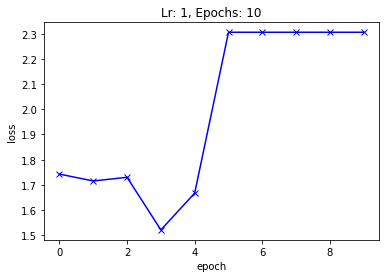

In [10]:
plot_losses(losses,'Lr: 1, Epochs: 10')

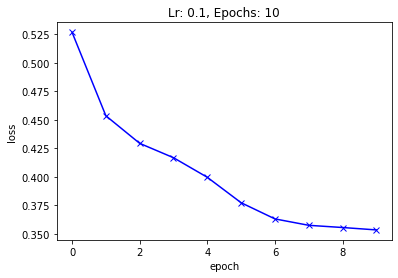

In [17]:
plot_losses(losses,'Lr: 0.1, Epochs: 10')

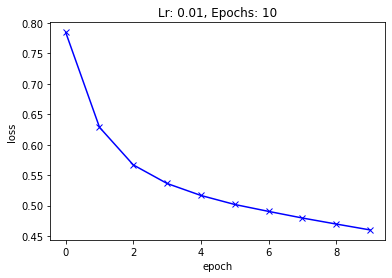

In [24]:
plot_losses(losses,'Lr: 0.01, Epochs: 10')

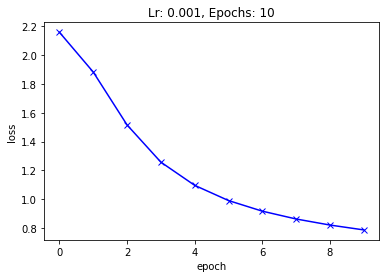

In [31]:
plot_losses(losses,'Lr: 0.001, Epochs: 10')

## 1.2

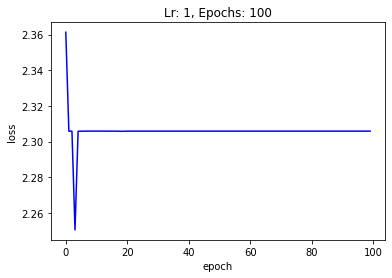

In [57]:
plot_losses(losses,'Lr: 1, Epochs: 100')

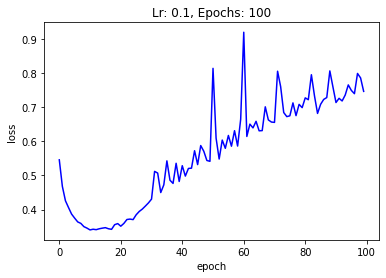

In [65]:
plot_losses(losses,'Lr: 0.1, Epochs: 100')

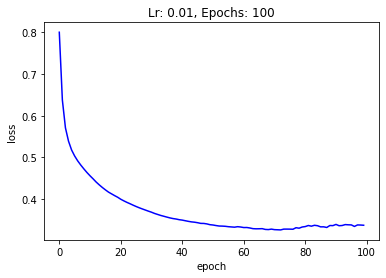

In [73]:
plot_losses(losses,'Lr: 0.01, Epochs: 100')

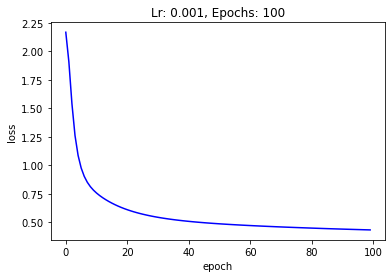

In [81]:
plot_losses(losses,'Lr: 0.001, Epochs: 100')

## 1.4

### Base Case

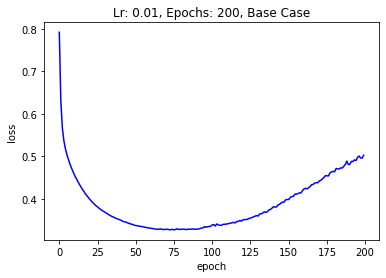

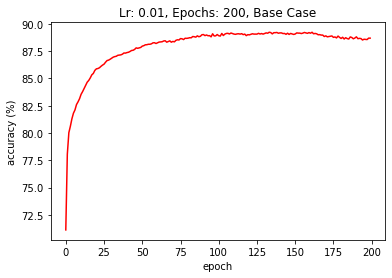

In [28]:
plot_losses(losses,'Lr: 0.01, Epochs: 200, Base Case')
plot_acc(accs,'Lr: 0.01, Epochs: 200, Base Case')

In [29]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 512]         131,584
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.29
Estimated Total Size (MB): 1.31
----------------------------------------------------------------


### Deeper Network

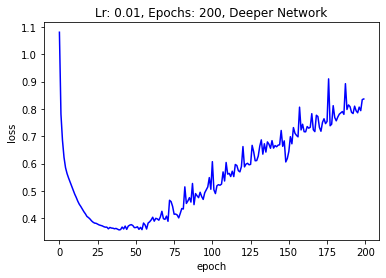

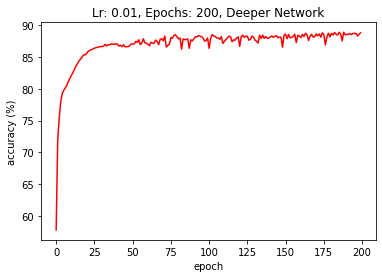

In [37]:
plot_losses(losses,'Lr: 0.01, Epochs: 200, Deeper Network')
plot_acc(accs,'Lr: 0.01, Epochs: 200, Deeper Network')

In [38]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 512]         131,584
              ReLU-5                  [-1, 512]               0
            Linear-6                 [-1, 1024]         525,312
              ReLU-7                 [-1, 1024]               0
            Linear-8                 [-1, 2048]       2,099,200
              ReLU-9                 [-1, 2048]               0
           Linear-10                   [-1, 10]          20,490
Total params: 2,977,546
Trainable params: 2,977,546
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 11.36
Estima

### Wider Network

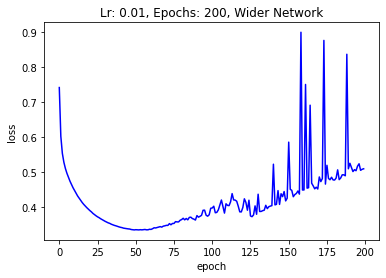

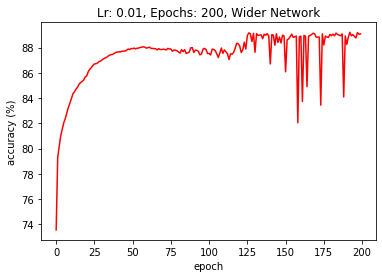

In [45]:
plot_losses(losses,'Lr: 0.01, Epochs: 200, Wider Network')
plot_acc(accs,'Lr: 0.01, Epochs: 200, Wider Network')

In [46]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1024]         803,840
              ReLU-3                 [-1, 1024]               0
            Linear-4                 [-1, 2048]       2,099,200
              ReLU-5                 [-1, 2048]               0
            Linear-6                   [-1, 10]          20,490
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 11.15
Estimated Total Size (MB): 11.21
----------------------------------------------------------------


## 1.7

Epoch 1
-------------------------------
loss: 2.308116  [    0/60000]
loss: 2.169763  [ 6400/60000]
loss: 1.814994  [12800/60000]
loss: 1.508841  [19200/60000]
loss: 1.149562  [25600/60000]
loss: 1.039146  [32000/60000]
loss: 0.999168  [38400/60000]
loss: 0.874736  [44800/60000]
loss: 0.875683  [51200/60000]
loss: 0.812703  [57600/60000]


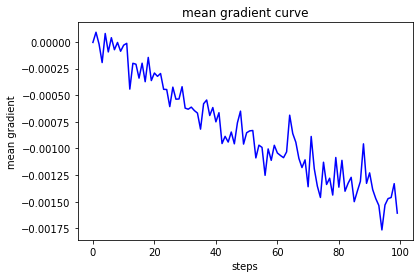

Test Error: 
 Accuracy: 71.5%, Avg loss: 0.792834 

Done!
Time Taken:  5.672235727310181 s


In [9]:
#Train and test the model
epochs = 1
losses = []
accs = []
start = time.time()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    loss,acc = test(test_dataloader, model, loss_fn)
    losses.append(loss)
    accs.append(acc)
end = time.time()
print("Done!")
print("Time Taken: ", end-start,"s")